<a href="https://colab.research.google.com/github/Shalinis19137/Titanic_Survival__Celebal_4/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

# Initial Overview

In [ ]:
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

# Fill missing values

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # too many missing values

<ipython-input-4-613912155>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-613912155>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

# Convert categorical to numerical

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-numeric or identifier columns

In [ ]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# EDA Visualizations

# 1. Distribution Plots

Distribution Plots are visualizations used to show how values in a dataset are spread across different ranges. They help identify patterns such as skewness, central tendency (mean/median), and variability. Common types include histograms and KDE (Kernel Density Estimation) plots, which are useful for understanding the frequency and shape of data distributions

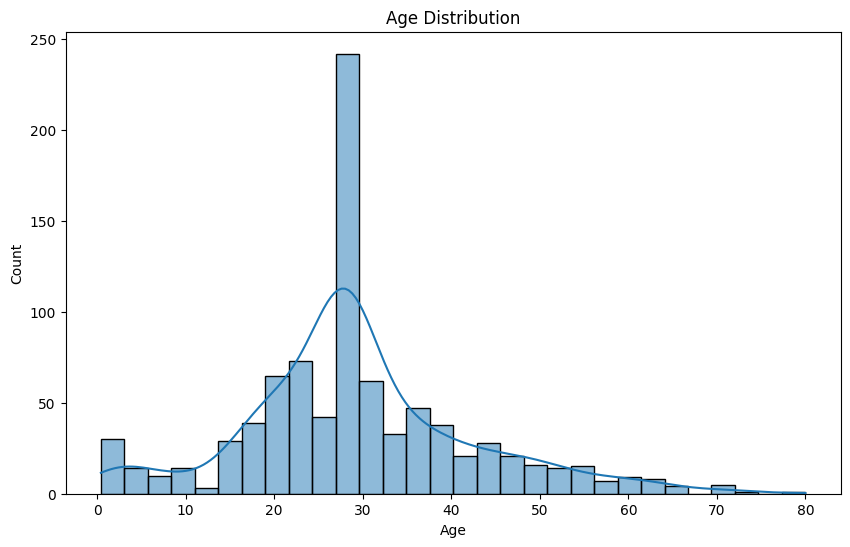

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


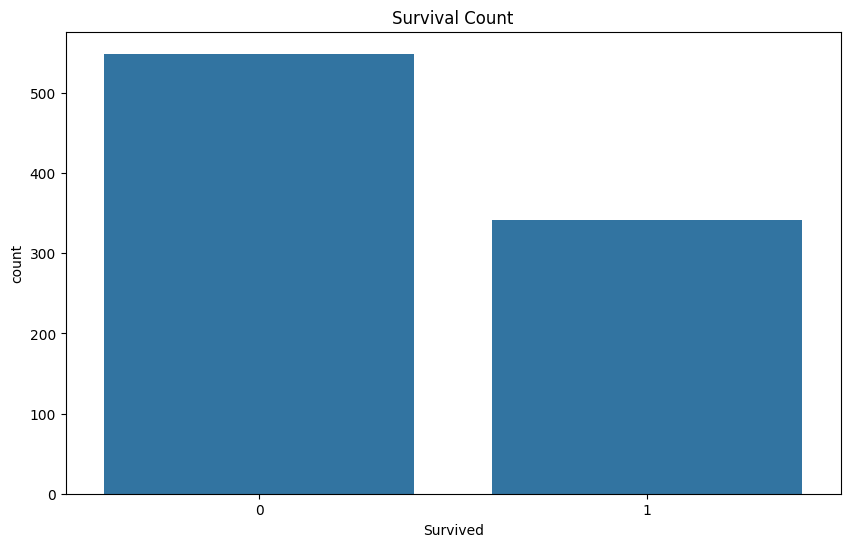

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# 2. Box Plot for Age vs Survived

# A box plot for Age vs Survived visually compares the age distributions of passengers who survived (1) and those who did not survive (0).
It helps identify:

Median ages in both groups

Age spread (interquartile range)

Outliers (very young or old passengers)

Whether survival chances were influenced by age patterns

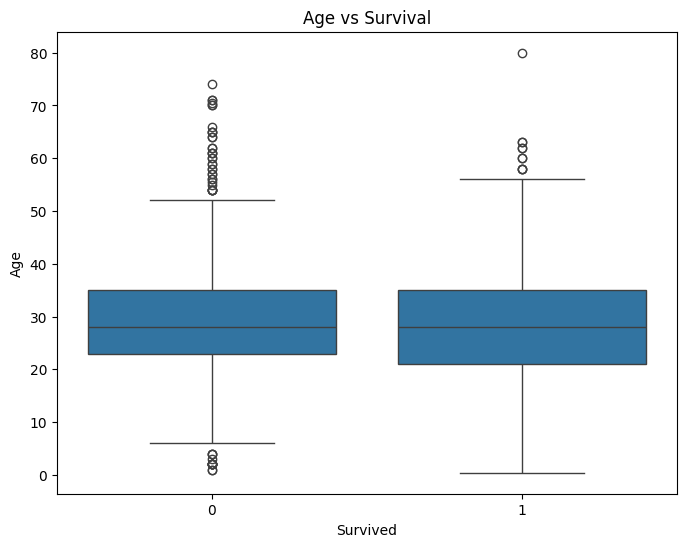

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# 3. Heatmap for correlations

A heatmap for correlations is a visual representation that shows the strength and direction of relationships between numerical variables in a dataset. Each cell in the heatmap displays a correlation coefficient (ranging from -1 to 1), where:

+1 indicates a strong positive relationship

0 indicates no relationship

-1 indicates a strong negative relationship

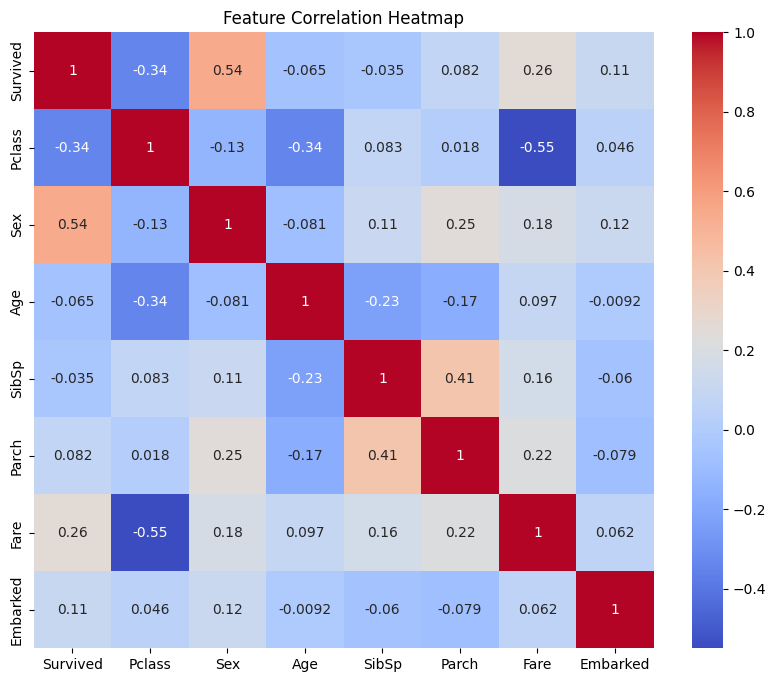

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Features and Target

Features are the input variables (independent variables) used to predict an outcome.
👉 Example: Pclass, Age, Sex, Fare, etc.

Target is the output variable (dependent variable) you want to predict.
👉 Example: Survived (0 = No, 1 = Yes)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/Test Split

Train/Test Split is a technique used in machine learning to evaluate a model's performance. It involves dividing the dataset into two parts:

Training Set: Used to train the model (usually 70–80% of the data).

Test Set: Used to test how well the model performs on unseen data (typically 20–30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

Model Training is the process of teaching a machine learning algorithm to make predictions or decisions by feeding it historical data (features and labels). During training, the model learns patterns and relationships in the data to minimize error and improve accuracy for future predictions

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Prediction and Evaluation

Prediction and Evaluation in machine learning refer to:

Prediction: Using a trained model to estimate the output (e.g., survival) on new, unseen data.

Evaluation: Measuring how well the model performs using metrics like accuracy, confusion matrix, precision, recall, and F1-score.

In [ ]:
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458


# Probability of survival

Probability of Survival refers to the likelihood that a passenger on the Titanic would survive the disaster, based on various factors such as age, gender, passenger class, fare, and port of embarkation. It is typically calculated using machine learning models like Logistic Regression, which estimate the chances of survival as a percentage between 0 and 100%

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
prob_df = pd.DataFrame({'Actual': y_test.values, 'Predicted Probability of Survival': probs})
print("\nSample Survival Probabilities:\n", prob_df.head())


Sample Survival Probabilities:
    Actual  Predicted Probability of Survival
0       1                           0.094183
1       0                           0.225887
2       0                           0.135364
3       1                           0.890186
4       1                           0.699163


# === USER INPUT FOR SURVIVAL PREDICTION ===

# Input Fields

In [ ]:
try:
    pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
    sex = input("Enter Sex (male/female): ").strip().lower()
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
    parch = int(input("Enter Number of Parents/Children Aboard: "))
    fare = float(input("Enter Fare Paid: "))
    embarked = input("Enter Port of Embarkation (S, C, Q): ").strip().upper()

    # Mapping user inputs to model format
    sex_num = 0 if sex == 'male' else 1
    embarked_num = {'S': 0, 'C': 1, 'Q': 2}.get(embarked, 0)

    user_data = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex_num,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked': embarked_num
    }])

    # Predict Probability
    user_prob = model.predict_proba(user_data)[0][1]
    print(f"\n Estimated Probability of Survival: {user_prob*100:.2f}%")

except Exception as e:
    print(" Invalid input. Please try again. Error:", str(e))


Enter Passenger Class (1, 2, or 3): 3
Enter Sex (male/female): female
Enter Age: 40
Enter Number of Siblings/Spouses Aboard: 2
Enter Number of Parents/Children Aboard: 2
Enter Fare Paid: 800
Enter Port of Embarkation (S, C, Q): Q

 Estimated Probability of Survival: 88.17%
